# Simulation of  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date :April 1st 2021
- creation update : April 1th 2021
- version v0

# Imports

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [65]:
from iminuit import Minuit
import iminuit

In [66]:
iminuit.__version__

'2.2.0'

In [67]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [96]:
from spectractor import parameters
from spectractor.simulation.simulator import AtmosphereGrid, SpectrumSimulatorSimGrid
from spectractor.config import load_config
from spectractor.simulation.image_simulation import ImageSim
from spectractor.logbook import LogBook
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum

# Function

In [69]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [70]:
filename_logbook='logbooks/auxtellogbook_2021_v1.1.csv'
#filename_logbook='logbooks/ctiofulllogbook_jun2017_v5.csv'

In [71]:
df=pd.read_csv(filename_logbook)

In [72]:
pd.set_option('display.max_rows', None)

In [73]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,...,10.3,51.0,9.3,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,...,10.4,45.0,9.9,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,...,8.8,53.0,7.3,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,...,8.8,54.0,6.3,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,...,8.8,54.0,6.3,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,...,8.7,55.0,6.7,NaN,NaN,NaN,NaN,,NaN,NaN


In [74]:
logbook = LogBook(logbook=filename_logbook)

Caught this error: AttributeError("'DataFrame' object has no attribute 'date'")
But try another solution to open logbook file logbooks/auxtellogbook_2021_v1.1.csv


# Selection of input file

In [75]:
dir_images="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [76]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [77]:
#filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits' reconstruit à moitié
#filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'
#filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' BOUGE
#filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' BOUGE
#filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' BOUGE
#filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BOUGE
#filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BOUGE
#filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
#filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits' GOOD
filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' BAD FOCUS
#filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' BAD FOCUS

In [78]:
filename_image

'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits'

In [79]:
disperser_label, target, xpos, ypos = logbook.search_for_image(filename_image)

In [80]:
print('disperser_label = ',disperser_label)
print('target          = ',target)
print('xpos            = ',xpos)
print('ypos            = ',ypos)

disperser_label =  holo4_003
target          =  HD75519
xpos            =  300
ypos            =  2500


In [81]:
file_target(filename_image)

['HD75519']

In [82]:
file_name=os.path.join(dir_images,filename_image)
dir_spectractor_spectra="./outputs"
dir_spectractor_spectrasim="./outputsim"
guess = [250,2600]
disperser_label = "holo4_003"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
targetname = file_target(filename_image)[0]

In [83]:
tag = file_name.split('/')[-1]
spectrum_file_name = dir_spectractor_spectra + '/' + tag.replace('.fits', '_spectrum.fits')

In [84]:
spectrum_file_name

'./outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_293_spectrum.fits'

In [85]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Load configuration of the running mode

In [86]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [87]:
load_config(config)

In [88]:
parameters.OBS_NAME

'AUXTEL'

# Load Spectrum

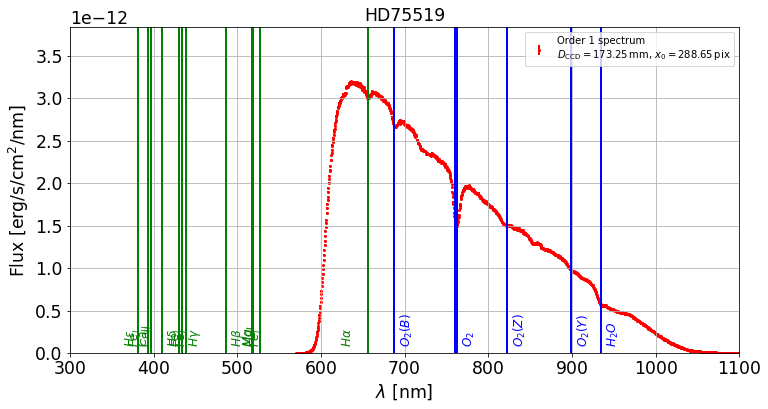

In [98]:
s=Spectrum(spectrum_file_name, config=config)
s.plot_spectrum(force_lines=True)

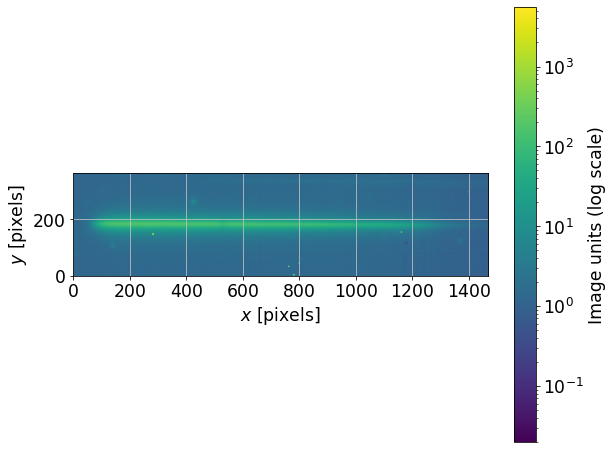

In [99]:
s.plot_spectrogram(scale="log")

# Simulation

need to do:
- define LIBRADTRAN_DIR: 
             export LIBRADTRAN_DIR=${LIBRADTRANDIR}
             LIBRADTRAN_DIR=/Users/dagoret/MacOSX/External/libRadtran2
             
- LIBRADTRAN_DIR:
              /Users/dagoret/MacOSX>ls $LIBRADTRAN_DIR
              bin                     include                 libRadtran-2.0.3        share
              data                    lib                     libradtran-2.0.3.tar.gz

- /Users/dagoret/MacOSX/External/libRadtran2>ln -s share/libRadtran/data


In [89]:
parameters.LIBRADTRAN_DIR

'/Users/dagoret/MacOSX/External/libRadtran2/'

In [90]:
atmgrid = AtmosphereGrid(file_name)

In [92]:
spectrum_file_name

'./outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_293_spectrum.fits'

In [91]:
SpectrumSimulatorSimGrid(spectrum_file_name, dir_spectractor_spectrasim)

IndexError: list index out of range